## 前向传播

sigmoid 激活函数：
$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

sigmoid 导数：
$$
x*(1-x)
$$

核心：
矩阵计算

输入：input
首先计算隐藏层数据：
$$
hidden = sigmoid(input * w1 + b1)
$$

参数更新规则：

1. 权重更新：

$$ w = w - \alpha \cdot \frac{\partial L}{\partial w} $$

2. 偏置更新：

$$ b = b - \alpha \cdot \frac{\partial L}{\partial b} $$

$w$表示权重

$b$表示偏置

$\alpha$ 表示学习率

$\frac{\partial L}{\partial }$ 是损失函数对权重 $w$ 的偏导数

$\frac{\partial L}{\partial }$ 是损失函数对 $b$ 的偏导数


In [1]:
import numpy as np

class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # 初始化权重和偏置
        self.weights1 = np.random.randn(input_size, hidden_size)
        self.bias1 = np.random.randn(hidden_size)
        self.weights2 = np.random.randn(hidden_size, output_size)
        self.bias2 = np.random.randn(output_size)

    def sigmoid(self, x):
        # 激活函数
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        # Sigmoid 激活函数的导数
        return x * (1 - x)

    def forward_propagation(self, input_data):
        # 前向传播
        # hidden = sigmoid(i * w1 + b1)
        self.hidden = self.sigmoid(np.dot(input_data, self.weights1) + self.bias1)
        # output = sigmoid(hidden * w2 + b2)
        output = self.sigmoid(np.dot(self.hidden, self.weights2) + self.bias2)
        return output

    def backpropagation(self, input_data, output, expected_output):
        # 反向传播
        # 计算误差
        # 损失函数：如方差计算等
        error = expected_output - output
        # 反向传播误差并计算梯度
        d_weights2 = np.dot(self.hidden.T, (2 * error * self.sigmoid_derivative(output)))
        d_bias2 = 2 * error * self.sigmoid_derivative(output)
        d_weights1 = np.dot(input_data.T,  (np.dot(2 * error * self.sigmoid_derivative(output), self.weights2.T) * self.sigmoid_derivative(self.hidden)))
        d_bias1 = np.dot(2 * error * self.sigmoid_derivative(output), self.weights2.T) * self.sigmoid_derivative(self.hidden)

        # 更新权重和偏置
        self.weights1 += d_weights1
        self.bias1 += d_bias1.sum(axis=0)
        self.weights2 += d_weights2
        self.bias2 += d_bias2.sum(axis=0)

    def train(self, input_data, expected_output):
        output = self.forward_propagation(input_data)
        self.backpropagation(input_data, output, expected_output)

# 示例：一个简单的神经网络，输入层大小为 2，隐藏层大小为 3，输出层大小为 1
nn = SimpleNeuralNetwork(input_size=2, hidden_size=3, output_size=1)

# 示例数据
input_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
expected_output = np.array([[0], [1], [1], [0]])

# 训练网络
for _ in range(1000):
    nn.train(input_data, expected_output)

# 测试网络
output = nn.forward_propagation(input_data)
output


array([[0.02628811],
       [0.97395472],
       [0.97397188],
       [0.02821358]])

**网络结构**  

将上述神经网络结构可视化为：


// Simple Neural Network
digraph {
	rankdir=LR
	I1 [label="input 1"]
	I2 [label="input 2"]
	H1 [label="hidden 1"]
	H2 [label="hidden 2"]
	H3 [label="hidden 3"]
	O1 [label=output]
	I1 -> H1
	I1 -> H2
	I1 -> H3
	I2 -> H1
	I2 -> H2
	I2 -> H3
	H1 -> O1
	H2 -> O1
	H3 -> O1
}



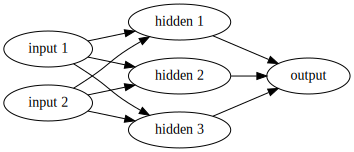

In [2]:
from graphviz import Digraph

def create_neural_network_graph():
    # 创建 Digraph 对象
    dot = Digraph(comment='Simple Neural Network')

    # 设置图的方向为从左到右
    dot.attr(rankdir='LR')

    # 添加输入层节点
    dot.node('I1', 'input 1')
    dot.node('I2', 'input 2')

    # 添加隐藏层节点
    dot.node('H1', 'hidden 1')
    dot.node('H2', 'hidden 2')
    dot.node('H3', 'hidden 3')

    # 添加输出层节点
    dot.node('O1', 'output')

    # 添加边，表示节点之间的连接
    # 输入层到隐藏层的连接
    dot.edge('I1', 'H1')
    dot.edge('I1', 'H2')
    dot.edge('I1', 'H3')
    dot.edge('I2', 'H1')
    dot.edge('I2', 'H2')
    dot.edge('I2', 'H3')

    # 隐藏层到输出层的连接
    dot.edge('H1', 'O1')
    dot.edge('H2', 'O1')
    dot.edge('H3', 'O1')

    # 返回图对象
    return dot

# 创建神经网络图
nn_graph = create_neural_network_graph()

# 输出图的源代码
print(nn_graph.source)

nn_graph

总结一下：

人工神经网络的本质就是矩阵计算，指定输入、输出，然后在矩阵计算中拟合出合适的权重和偏置，从而实现输入到输出的映射。

而这个映射并不是简单的线性映射，而是通过激活函数的非线性变换，从而实现复杂的非线性映射。

矩阵计算是手段，但本质是概率。